In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
filename = "psi.dat"
data = np.loadtxt(filename)

x = data[:, 0]
psi0 = data[:, 1]
psi1 = data[:, 2]

iterations = np.arange(1, 9, 1)

In [10]:
def hamiltonian(N, L):
    H = np.zeros((N, N))
    deltax_squared = (L / N) ** 2
    for i in range(N):
        H[i, i] = 1.0 / deltax_squared
        right = (i + 1) % N
        left = (i - 1) % N
        H[i, right] = -1.0 / (2.0 * deltax_squared)
        H[i, left] = -1.0 / (2.0 * deltax_squared)

        x = (i-1) * (L / N) - L / 2.0
        H[i, i] += x**4 / 24
    return H

H = hamiltonian(100, 10.0)

In [14]:
eigenvalues, eigenvectors = np.linalg.eigh(H)
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

eigenvectors[1].size

psi_0 = eigenvectors[:, 0]
psi_1 = eigenvectors[:, 1]

In [17]:
filename2 = "exact.dat"

exact = np.loadtxt(filename2)
exact_psi0 = exact[:, 0]
exact_psi1 = exact[:, 1]


In [15]:
jumps = np.where(x[:-1] > x[1:])[0]
length = len(jumps)

x_final = x[jumps[length-1]+1:]
psi0_final = psi0[jumps[length-1]+1:]
psi1_final = psi1[jumps[length-1]+1:]

Text(0.5, 1.0, 'Wave Functions for Iteration 1000')

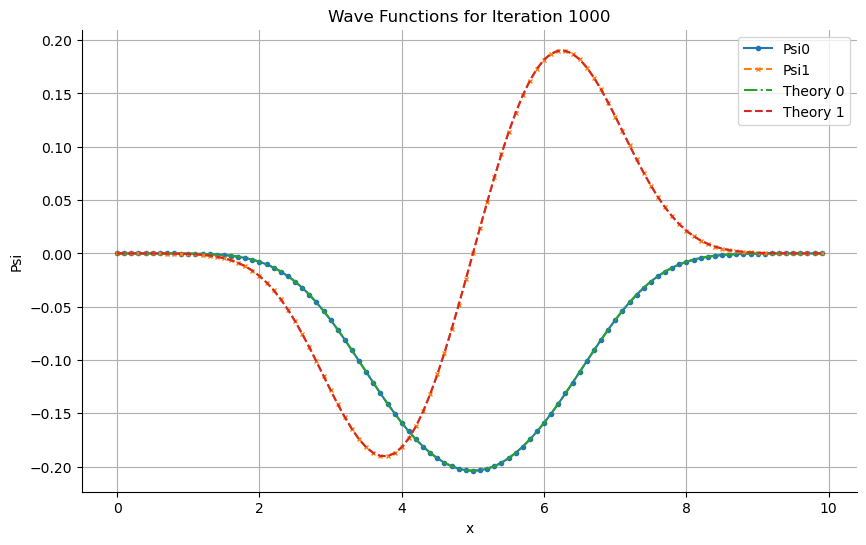

In [18]:


plt.figure(figsize=(10, 6))
plt.plot(x_final, psi0_final, label="Psi0", marker='o', markersize=3, linestyle='-')
plt.plot(x_final, psi1_final, label="Psi1", marker='x', markersize=3, linestyle='--')
plt.plot(x_final, exact_psi0, label="Theory 0", linestyle='-.')
plt.plot(x_final, exact_psi1, label="Theory 1", linestyle='--')
plt.xlabel("x")
plt.ylabel("Psi")
plt.legend()
plt.grid()
sns.despine()
plt.title("Wave Functions for Iteration 1000")


# for i in range(1, 9):
#     plt.figure(figsize=(10, 6))
#     plt.plot(x_dict[i], psi0_dict[i], label=f"Iteration {i} - Psi0", marker='o', markersize=3, linestyle='-')
#     plt.plot(x_dict[i], psi1_dict[i], label=f"Iteration {i} - Psi1", marker='x', markersize=3, linestyle='--')